In [78]:
import koreanize_matplotlib

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats 

In [ ]:
brand_frcs_df = pd.read_csv('./brand_frcs_stats_full.csv')  
brand_frcs_df.head()

,Unnamed: 0,yr,indutyLclasNm,indutyMlsfcNm,corpNm,brandNm,frcsCnt,newFrcsRgsCnt,ctrtEndCnt,ctrtCncltnCnt,nmChgCnt,avrgSlsAmt,arUnitAvrgSlsAmt
0,0,2020,외식,한식,(주)정담에프엔씨,광안국밥,0,0,0,0,0,0,0
1,1,2020,외식,한식,신솔푸드,괭이부리마을,0,0,0,0,0,0,0
2,2,2020,외식,한식,(주)제주소나이,괸당집,6,6,0,0,0,357400,17176
3,3,2020,외식,한식,(주)교동F&amp;B,교동면옥,35,22,0,0,1,820597,9845
4,4,2020,외식,한식,(주)교동,교동전선생,37,0,5,5,0,359159,11867


In [59]:
brand_frcs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49766 entries, 0 to 49765
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        49766 non-null  int64 
 1   yr                49766 non-null  int64 
 2   indutyLclasNm     49766 non-null  object
 3   indutyMlsfcNm     49766 non-null  object
 4   corpNm            49766 non-null  object
 5   brandNm           49766 non-null  object
 6   frcsCnt           49766 non-null  int64 
 7   newFrcsRgsCnt     49766 non-null  int64 
 8   ctrtEndCnt        49766 non-null  int64 
 9   ctrtCncltnCnt     49766 non-null  int64 
 10  nmChgCnt          49766 non-null  int64 
 11  avrgSlsAmt        49766 non-null  int64 
 12  arUnitAvrgSlsAmt  49766 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 4.9+ MB


In [60]:
brand_frcs_df.isna().sum()

Unnamed: 0          0
yr                  0
indutyLclasNm       0
indutyMlsfcNm       0
corpNm              0
brandNm             0
frcsCnt             0
newFrcsRgsCnt       0
ctrtEndCnt          0
ctrtCncltnCnt       0
nmChgCnt            0
avrgSlsAmt          0
arUnitAvrgSlsAmt    0
dtype: int64

In [61]:
brand_frcs_df.drop('Unnamed: 0', axis=1, inplace=True)  

In [62]:
brand_frcs_df = brand_frcs_df.rename(columns={
    "yr": "기준연도",
    "indutyLclasNm": "업종대분류",
    "indutyMlsfcNm": "업종중분류",
    "corpNm": "법인명",
    "brandNm": "브랜드명",
    "frcsCnt": "가맹점수",
    "newFrcsRgsCnt": "신규가맹점등록수",
    "ctrtEndCnt": "계약만료수",
    "ctrtCncltnCnt": "계약해지수",
    "nmChgCnt": "상호변경수",
    "avrgSlsAmt": "연평균매출액",
    "arUnitAvrgSlsAmt": "단위면적당평균매출액"
    
})


In [54]:
brand_frcs_df[brand_frcs_df['기준연도']==2022].shape

(10185, 12)

In [55]:
brand_frcs_df[brand_frcs_df['기준연도']==2023].shape

(11167, 12)

In [56]:
brand_frcs_df[brand_frcs_df['기준연도']==2024].shape

(11834, 12)

In [53]:
brand_frcs_df.head()

,기준연도,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액
0,2020,외식,한식,(주)정담에프엔씨,광안국밥,0,0,0,0,0,0,0
1,2020,외식,한식,신솔푸드,괭이부리마을,0,0,0,0,0,0,0
2,2020,외식,한식,(주)제주소나이,괸당집,6,6,0,0,0,357400,17176
3,2020,외식,한식,(주)교동F&amp;B,교동면옥,35,22,0,0,1,820597,9845
4,2020,외식,한식,(주)교동,교동전선생,37,0,5,5,0,359159,11867


In [31]:
brand_frcs_df.describe(include='all')   

,기준연도,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액
count,49766.000000,49766,49766,49766,49766,49766.000000,49766.000000,49766.000000,49766.000000,49766.000000,4.976600e+04,4.976600e+04
unique,NaN,3,44,14114,18447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,외식,한식,(주)엘에이치지,명동칼국수,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,39699,13938,159,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2022.239461,NaN,NaN,NaN,NaN,30.180203,6.515633,2.475907,0.926797,1.495981,1.124043e+05,2.779891e+05
std,1.354062,NaN,NaN,NaN,NaN,324.623983,91.789805,20.892394,9.690590,21.600491,7.137299e+05,6.097541e+07
min,2020.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2021.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,2022.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
75%,2023.000000,NaN,NaN,NaN,NaN,12.000000,3.000000,1.000000,0.000000,0.000000,1.407015e+05,5.792000e+03


## Clustering

In [63]:
filter_df=brand_frcs_df[brand_frcs_df['기준연도']==2023]
filter_df.head()

,기준연도,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액
26765,2023,외식,한식,8797푸드,돼지가 김치찜했어,4,2,0,0,0,0,0
26766,2023,외식,한식,(주)위푸드마켓,돼지33,1,0,1,0,0,276000,27600
26767,2023,외식,한식,(주)네오플러스,돼왕국밥,0,0,0,0,0,0,0
26768,2023,외식,한식,(주)덩실덩실,돼슐랭,0,0,0,0,0,0,0
26769,2023,외식,한식,(주)와이앤티푸드,동해물과 아구찜,11,17,6,0,0,0,0


In [64]:
filter_df.reset_index(drop=True, inplace=True) 
filter_df.head() 

,기준연도,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액
0,2023,외식,한식,8797푸드,돼지가 김치찜했어,4,2,0,0,0,0,0
1,2023,외식,한식,(주)위푸드마켓,돼지33,1,0,1,0,0,276000,27600
2,2023,외식,한식,(주)네오플러스,돼왕국밥,0,0,0,0,0,0,0
3,2023,외식,한식,(주)덩실덩실,돼슐랭,0,0,0,0,0,0,0
4,2023,외식,한식,(주)와이앤티푸드,동해물과 아구찜,11,17,6,0,0,0,0


In [65]:
filter_df.drop('기준연도', axis=1, inplace=True)        

/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_3517/1908333518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df.drop('기준연도', axis=1, inplace=True)


In [66]:
filter_df.head()

,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액
0,외식,한식,8797푸드,돼지가 김치찜했어,4,2,0,0,0,0,0
1,외식,한식,(주)위푸드마켓,돼지33,1,0,1,0,0,276000,27600
2,외식,한식,(주)네오플러스,돼왕국밥,0,0,0,0,0,0,0
3,외식,한식,(주)덩실덩실,돼슐랭,0,0,0,0,0,0,0
4,외식,한식,(주)와이앤티푸드,동해물과 아구찜,11,17,6,0,0,0,0


In [72]:
filter_df['패업추정수']=filter_df['계약만료수']+filter_df['계약해지수']+filter_df['상호변경수'] 

/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_3517/2575865021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['패업추정수']=filter_df['계약만료수']+filter_df['계약해지수']+filter_df['상호변경수']


In [69]:
filter_df['연평균매출액'].describe()

count    1.116700e+04
mean     1.301739e+05
std      1.320549e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.522400e+05
max      1.363066e+08
Name: 연평균매출액, dtype: float64

In [70]:
filter_df['가맹점수'].describe()

count    11167.000000
mean        27.231127
std        318.889761
min          0.000000
25%          0.000000
50%          1.000000
75%         11.000000
max      17516.000000
Name: 가맹점수, dtype: float64

In [73]:
filter_df['패업추정수'].describe()

count    11167.000000
mean         4.752127
std         45.766840
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max       3067.000000
Name: 패업추정수, dtype: float64

<Axes: ylabel='Frequency'>

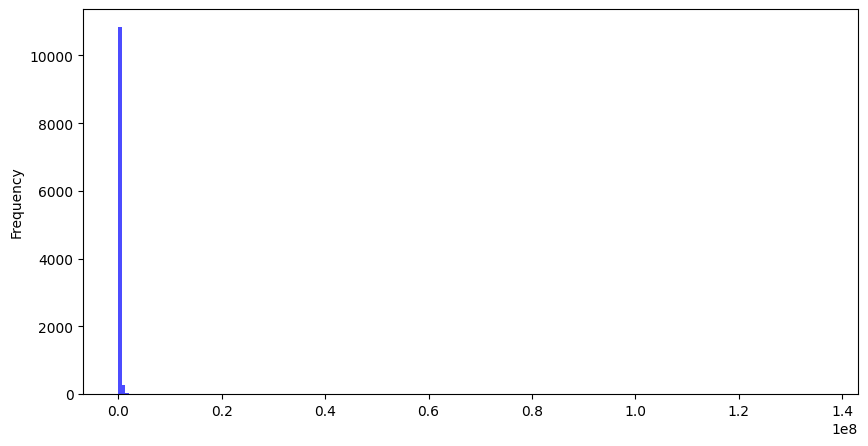

In [68]:
filter_df['연평균매출액'].plot(kind='hist', bins=200, figsize=(10, 5), color='blue', alpha=0.7)  

<Axes: ylabel='Frequency'>

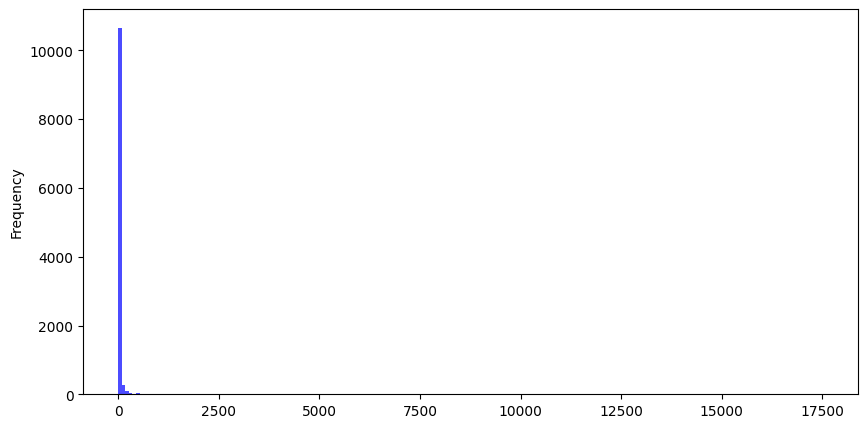

In [71]:
filter_df['가맹점수'].plot(kind='hist', bins=200, figsize=(10, 5), color='blue', alpha=0.7)  

<Axes: ylabel='Frequency'>

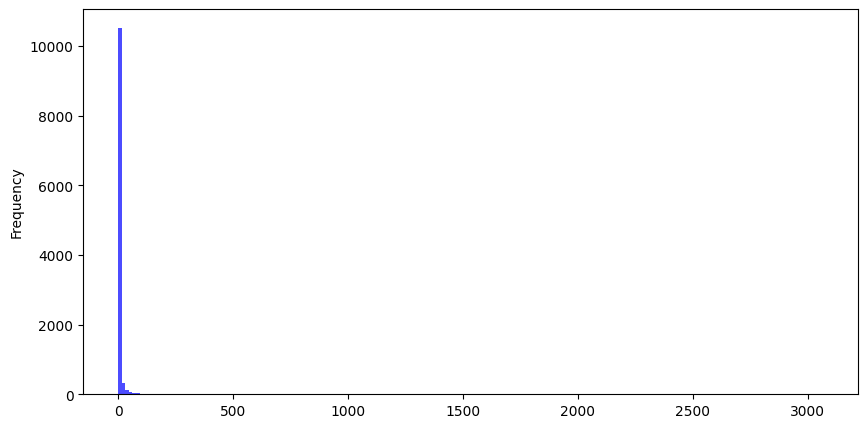

In [74]:
filter_df['패업추정수'].plot(kind='hist', bins=200, figsize=(10, 5), color='blue', alpha=0.7)  

In [75]:
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   업종대분류       11167 non-null  object
 1   업종중분류       11167 non-null  object
 2   법인명         11167 non-null  object
 3   브랜드명        11167 non-null  object
 4   가맹점수        11167 non-null  int64 
 5   신규가맹점등록수    11167 non-null  int64 
 6   계약만료수       11167 non-null  int64 
 7   계약해지수       11167 non-null  int64 
 8   상호변경수       11167 non-null  int64 
 9   연평균매출액      11167 non-null  int64 
 10  단위면적당평균매출액  11167 non-null  int64 
 11  패업추정수       11167 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [76]:
filter_df[['가맹점수','연평균매출액','단위면적당평균매출액']].describe()

,가맹점수,연평균매출액,단위면적당평균매출액
count,11167.000000,1.116700e+04,1.116700e+04
mean,27.231127,1.301739e+05,5.752394e+03
std,318.889761,1.320549e+06,1.305059e+05
min,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00
50%,1.000000,0.000000e+00,0.000000e+00
75%,11.000000,1.522400e+05,6.549500e+03
max,17516.000000,1.363066e+08,1.373510e+07


array([[<Axes: title={'center': '가맹점수'}>,
        <Axes: title={'center': '연평균매출액'}>],
       [<Axes: title={'center': '단위면적당평균매출액'}>, <Axes: >]], dtype=object)

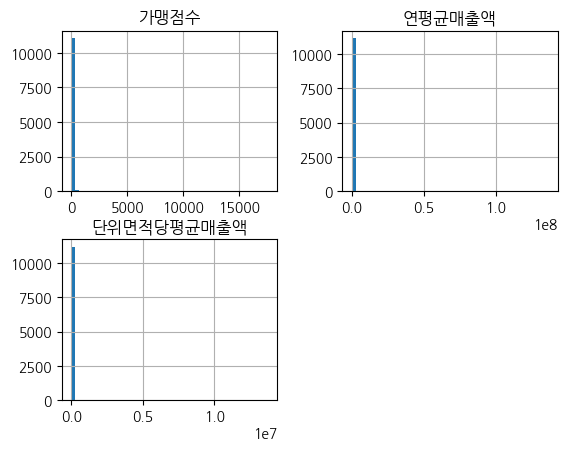

In [79]:
filter_df[['가맹점수','연평균매출액','단위면적당평균매출액']].hist(bins=50)

In [80]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(filter_df[["연평균매출액", "단위면적당평균매출액", "패업추정수"]])


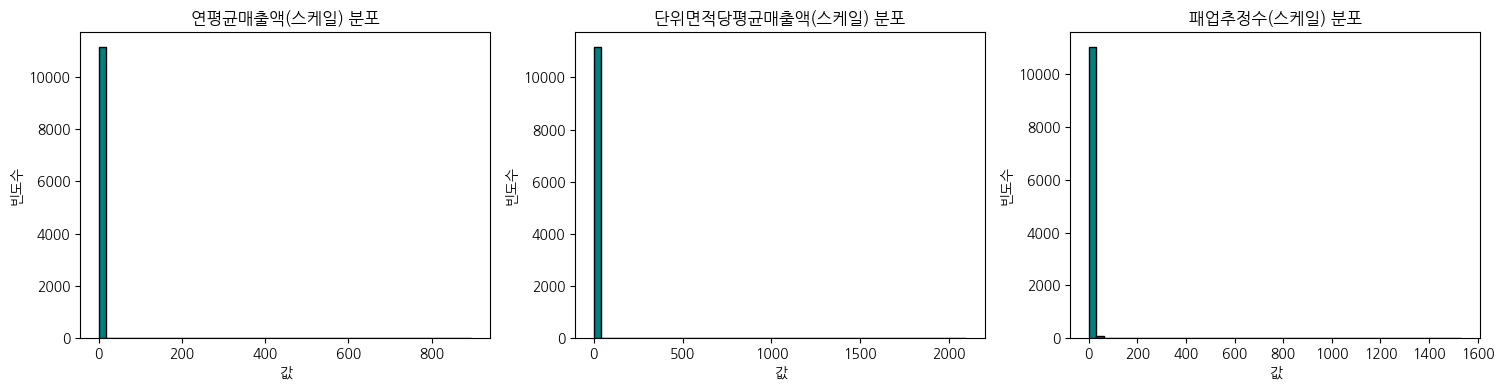

In [84]:
import matplotlib.pyplot as plt

scaled_feature_names = ["연평균매출액(스케일)", "단위면적당평균매출액(스케일)", "패업추정수(스케일)"]

plt.figure(figsize=(15, 4))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(X_scaled[:, i], bins=50, color='teal', edgecolor='black')
    plt.title(f"{scaled_feature_names[i]} 분포")
    plt.xlabel("값")
    plt.ylabel("빈도수")

plt.tight_layout()
plt.show()



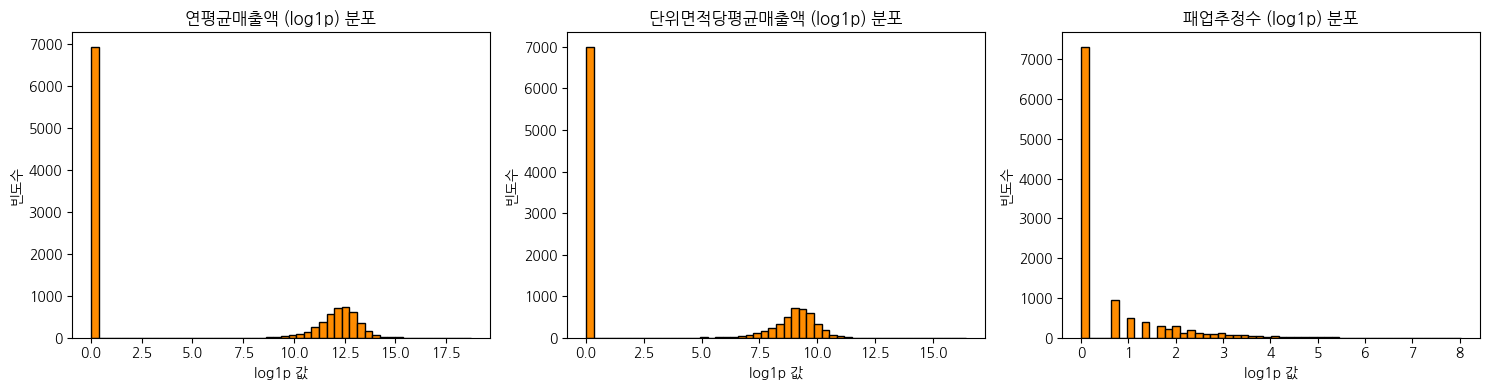

In [86]:

# 로그 변환
log_scaled = np.log1p(filter_df[["연평균매출액", "단위면적당평균매출액", "패업추정수"]].values)

log_feature_names = ["연평균매출액 (log1p)", "단위면적당평균매출액 (log1p)", "패업추정수 (log1p)"]

plt.figure(figsize=(15, 4))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(log_scaled[:, i], bins=50, color='darkorange', edgecolor='black')
    plt.title(f"{log_feature_names[i]} 분포")
    plt.xlabel("log1p 값")
    plt.ylabel("빈도수")

plt.tight_layout()
plt.show()


In [87]:

filter_df["log_연매출"] = np.log1p(filter_df["연평균매출액"])
filter_df["log_면적당매출"] = np.log1p(filter_df["단위면적당평균매출액"])
filter_df["log_폐업수"] = np.log1p(filter_df["패업추정수"])

/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_3517/4262710969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df["log_연매출"] = np.log1p(filter_df["연평균매출액"])
/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_3517/4262710969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df["log_면적당매출"] = np.log1p(filter_df["단위면적당평균매출액"])
/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_3517/4262710969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [91]:
X=filter_df[["log_연매출", "log_면적당매출", "log_폐업수"]].values  

In [92]:
from sklearn.cluster import KMeans

# 클러스터 수 설정
kmean = KMeans(n_clusters=8, n_init='auto', random_state=111)

# 모델 학습
kmean.fit(X)

# 클러스터 중심과 SSE 출력
centroids = kmean.cluster_centers_
inertia = kmean.inertia_

/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


In [93]:
! pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


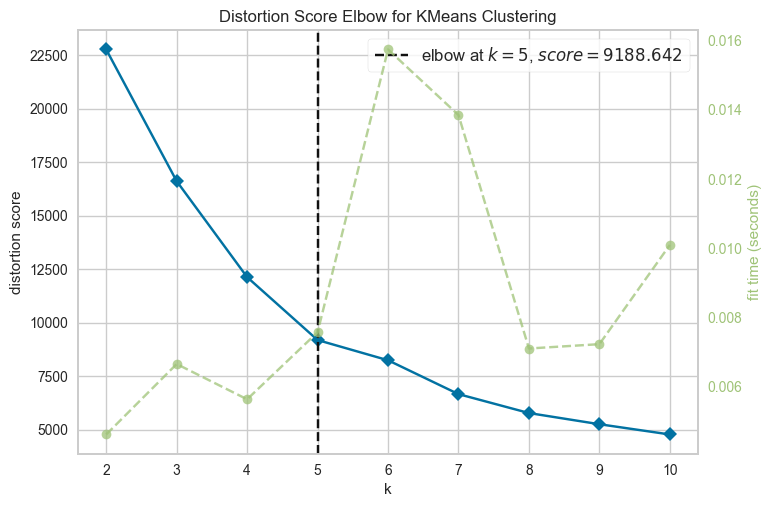

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
from yellowbrick.cluster import KElbowVisualizer

KEV=KElbowVisualizer(kmean,k=10,n_init='auto')
KEV.fit(X)
KEV.show()

In [95]:

n_cluster=5
k_means=KMeans(n_clusters=n_cluster,n_init='auto',random_state=111)
k_means.fit(X)

/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


KMeans(n_clusters=5, random_state=111)

In [96]:
pd.Series(k_means.labels_).value_counts()

0    6924
3    2034
1    1251
4     880
2      78
Name: count, dtype: int64

In [99]:
from sklearn.metrics import silhouette_score


In [100]:
silhouettes_avg=silhouette_score(X,k_means.labels_)

/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [102]:
silhouettes_avg

np.float64(0.7364388580315739)

/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


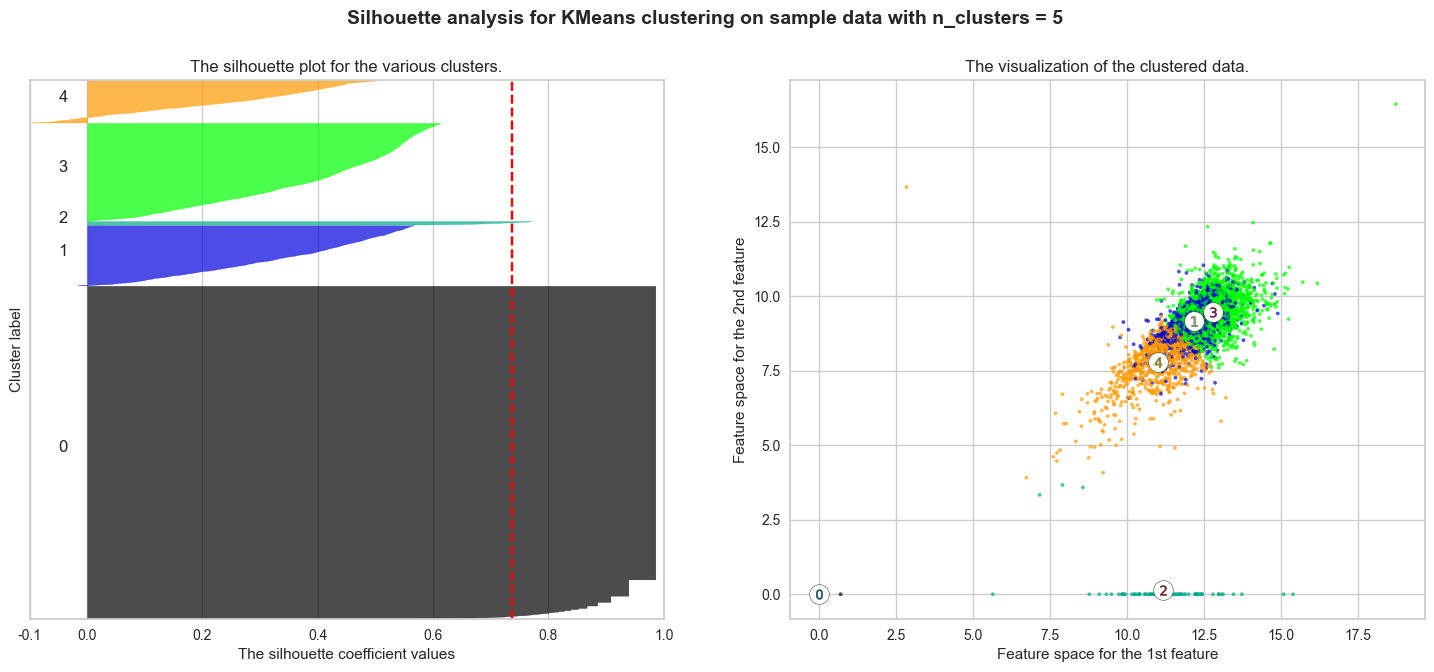

In [104]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_cluster + 1) * 10])

cluster_labels = k_means.labels_
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_cluster):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_cluster)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouettes_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = k_means.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_cluster,
    fontsize=14,
    fontweight="bold",
)

plt.show()